In [25]:
import tensorflow as tf
from keras import datasets, layers, models
import time
from matplotlib import pyplot as plt
import numpy as np

In [26]:
(X_train, y_train),(X_test,y_test) = datasets.fashion_mnist.load_data()

In [11]:
print(f"Training data shape = {X_train.shape}")
print(f"Training labels shape = {y_train.shape}")
print(f"Testing data shape = {X_test.shape}")
print(f"Testing labels shape = {y_test.shape}")

Training data shape = (60000, 28, 28)
Training labels shape = (60000,)
Testing data shape = (10000, 28, 28)
Testing labels shape = (10000,)


In [12]:
X_train.max()

255

In [27]:
X_train = X_train / 255.0
X_test = X_test / 255.0

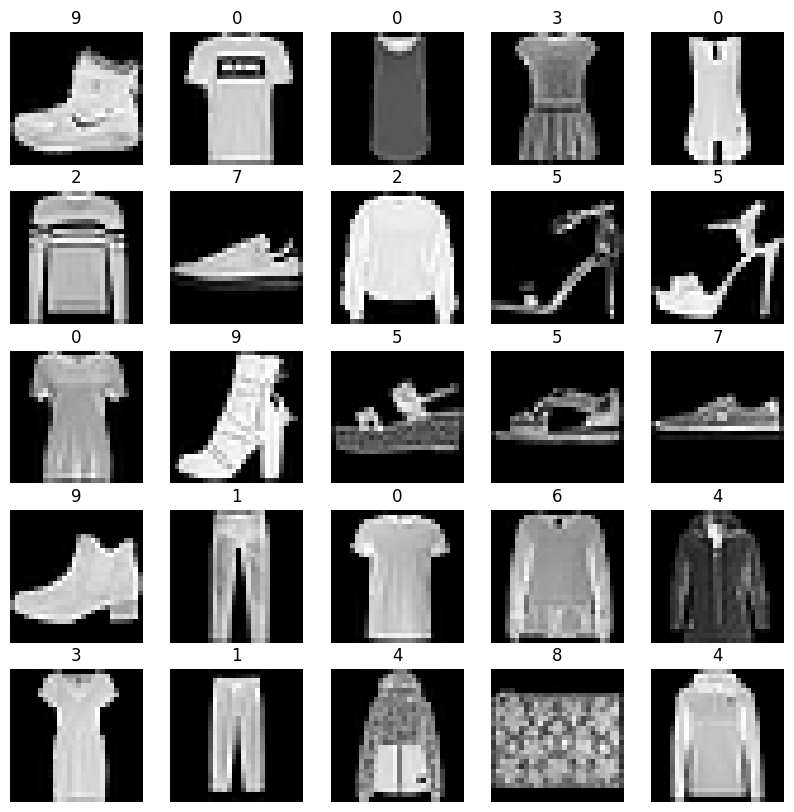

In [14]:
import matplotlib.pyplot as plt

def subplt (rows, cols, img, label):
  plt_img = img[:rows*cols]
  plt.figure(figsize=(rows*2,cols*2))
  
  for i in range(len(plt_img)):
    plt.subplot(rows, cols, i+1)
    plt.imshow(plt_img[i], cmap = 'gray')
    plt.title(label[i])
    plt.axis('off')
  
  return

subplt(rows = 5,cols = 5, img = X_train, label = y_train)

In [15]:
def mlp1(input_shape):
  model = models.Sequential(name='MLP1')
  model.add(layers.Flatten(input_shape=input_shape))
  model.add(layers.Dropout(0.20))
  model.add(layers.Dense(512, activation = 'relu', use_bias = True, kernel_initializer = 'he_uniform'))
  model.add(layers.Dropout(0.10))
  model.add(layers.Dense(10, activation = 'softmax', use_bias = True, kernel_initializer = 'he_uniform'))
  return model

mlp1 = mlp1((28,28))
mlp1.summary()

C:\Users\rohan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
mlp1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tmlp1 = time.time()
history1 = mlp1.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size = 512)
etmlp1 = time.time() - tmlp1

mlp1.save("mlp1-fashion-mnist.h5")

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.6591 - loss: 0.9944 - val_accuracy: 0.8398 - val_loss: 0.4662
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8247 - loss: 0.5026 - val_accuracy: 0.8428 - val_loss: 0.4369
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8440 - loss: 0.4510 - val_accuracy: 0.8584 - val_loss: 0.4082
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8521 - loss: 0.4154 - val_accuracy: 0.8635 - val_loss: 0.3830
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8581 - loss: 0.3947 - val_accuracy: 0.8684 - val_loss: 0.3674
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8650 - loss: 0.3747 - val_accuracy: 0.8740 - val_loss: 0.3510
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8712 - loss: 0.3546 - val_accuracy: 0.8763 - val_loss: 0.3410
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8727 - loss: 0.3508 - val_accuracy: 0.8817 - v

In [17]:
def mlp2(input_shape):
  model = models.Sequential(name='MLP2')
  model.add(layers.Flatten(input_shape=input_shape))
  model.add(layers.Dropout(0.20))
  model.add(layers.Dense(512, activation = 'relu', use_bias = True, kernel_initializer = 'he_uniform'))
  model.add(layers.Dropout(0.20))
  model.add(layers.Dense(256, activation = 'relu', use_bias = True, kernel_initializer = 'he_uniform'))
  model.add(layers.Dropout(0.10))
  model.add(layers.Dense(10, activation = 'softmax', use_bias = True, kernel_initializer = 'he_uniform'))
  return model

mlp2 = mlp2((28,28))
mlp2.summary()

Model: "MLP2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
mlp2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tmlp2 = time.time()
history2 = mlp2.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size = 512)
etmlp2 = time.time() - tmlp2

mlp2.save("mlp2-fashion-mnist.h5")

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.6353 - loss: 1.0437 - val_accuracy: 0.8301 - val_loss: 0.4755
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8212 - loss: 0.4951 - val_accuracy: 0.8492 - val_loss: 0.4154
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.8413 - loss: 0.4329 - val_accuracy: 0.8595 - val_loss: 0.3884
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.8495 - loss: 0.4099 - val_accuracy: 0.8696 - val_loss: 0.3597
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.8583 - loss: 0.3871 - val_accuracy: 0.8647 - val_loss: 0.3717
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.8607 - loss: 0.3740 - val_accuracy: 0.8731 - val_loss: 0.3502
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8666 - loss: 0.3548 - val_accuracy: 0.8804 - val_loss: 0.3355
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.8702 - loss: 0.3452 - val_accuracy: 0.8807 - v

In [19]:
def mlp3(input_shape):
  model = models.Sequential(name='MLP3')
  model.add(layers.Flatten(input_shape=input_shape))
  model.add(layers.Dropout(0.20))
  model.add(layers.Dense(512, activation = 'relu', use_bias = True, kernel_initializer = 'he_uniform'))
  model.add(layers.Dropout(0.20))
  model.add(layers.Dense(256, activation = 'relu', use_bias = True, kernel_initializer = 'he_uniform'))
  model.add(layers.Dropout(0.10))
  model.add(layers.Dense(128, activation = 'relu', use_bias = True, kernel_initializer = 'he_uniform'))
  model.add(layers.Dropout(0.10))
  model.add(layers.Dense(10, activation = 'softmax', use_bias = True, kernel_initializer = 'he_uniform'))
  return model

mlp3 = mlp3((28,28))

mlp3.summary()

Model: "MLP3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
mlp3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tmlp3 = time.time()
history3 = mlp3.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size = 512)
etmlp3 = time.time() - tmlp3

mlp3.save("mlp3-fashion-mnist.h5")

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.5967 - loss: 1.1320 - val_accuracy: 0.8207 - val_loss: 0.4887
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.8195 - loss: 0.5090 - val_accuracy: 0.8471 - val_loss: 0.4173
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.8364 - loss: 0.4481 - val_accuracy: 0.8583 - val_loss: 0.3937
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.8463 - loss: 0.4272 - val_accuracy: 0.8648 - val_loss: 0.3739
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.8522 - loss: 0.4012 - val_accuracy: 0.8702 - val_loss: 0.3546
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.8584 - loss: 0.3795 - val_accuracy: 0.8793 - val_loss: 0.3354
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - accuracy: 0.8665 - loss: 0.3606 - val_accuracy: 0.8795 - val_loss: 0.3297
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.8683 - loss: 0.3563 - val_accuracy: 0.8751

THE FOLLOWING IS 
MY MODEL 

In [21]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

C:\Users\rohan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tmodel = time.time()
history4 = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
etmodel = time.time() - tmodel

model.save("model-fashion-mnist.h5")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 28ms/step - accuracy: 0.7328 - loss: 0.7251 - val_accuracy: 0.8485 - val_loss: 0.4224
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.8722 - loss: 0.3486 - val_accuracy: 0.8766 - val_loss: 0.3357
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.8950 - loss: 0.2879 - val_accuracy: 0.8900 - val_loss: 0.3132
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9054 - loss: 0.2584 - val_accuracy: 0.8949 - val_loss: 0.2891
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9161 - loss: 0.2295 - val_accuracy: 0.8988 - val_loss: 0.2765
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 23ms/step - accuracy: 0.9213 - loss: 0.2094 - val_accuracy: 0.8990 - val_loss: 0.2721
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 23ms/step - accuracy: 0.9304 - loss: 0.1835 - val_accuracy: 0.9075 - val_loss: 0.2583
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9355 -

In [23]:
times = {
    1: etmlp1,
    2: etmlp2,
    3: etmlp3,
    4: etmodel
}

for i in range(1, 5):
    print(f"Time taken by mlp{i} to fit = {times[i]}")

Time taken by mlp1 to fit = 70.03490376472473
Time taken by mlp2 to fit = 100.69550395011902
Time taken by mlp3 to fit = 131.58478355407715
Time taken by mlp4 to fit = 596.872545003891


In [24]:
res = []
res.append(mlp1.evaluate(X_test,y_test))
res.append(mlp2.evaluate(X_test,y_test))
res.append(mlp3.evaluate(X_test,y_test))
res.append(model.evaluate(X_test,y_test))

for i, result in enumerate(res, start=1):
    print(f"Evaluation results for mlp{i}:")
    print("Loss:", result[0])
    print("Accuracy:", result[1], "\n")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8847 - loss: 0.3150
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8870 - loss: 0.3172
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8838 - loss: 0.3218
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9037 - loss: 0.2825
Evaluation results for mlp1:
Loss: 0.31467023491859436
Accuracy: 0.8855999708175659 

Evaluation results for mlp2:
Loss: 0.32279935479164124
Accuracy: 0.8848000168800354 

Evaluation results for mlp3:
Loss: 0.32477232813835144
Accuracy: 0.8847000002861023 

Evaluation results for mlp4:
Loss: 0.2750415802001953
Accuracy: 0.9081000089645386 



In [ ]:
THE MLP4 IS NOT A MLP BUT IT IS MY CNN MODEL, IT IS JUST THAT IN PRINTING I AM NOT CHANGING THE LOOP HENCE IT SHOWS MLP, PLEASE IGNORE TH